# Variable correlation analysisnotebook



## Data set



### Node info

APs are stationary and colocated. Clients are mobile and colocated. Data flows in the AP -> client direction, so clients are also referred to as receivers.

| 802.11 type | AP lat | AP lon | channel | cntr. freq (MHz) | bw (MHz) |
|-------------|--------|--------|---------|------------------|----------|
| n | 41.111879 | -8.631146 | 6 | 2437 | 20 |
| ac (wave 1) | 41.111879 | -8.631146 | 40 | 5200 | 40 |
| ad | 41.111879 | -8.631146 | 1 | 60480 | 2160 |

Main clients, all positioned in the moving vehicle's roof, a VW Golf Mk 3:

| 802.11 type | radio | nr. antennas |
|-------------|-----------------------------------|---|
| n           | csl usb 2.0 wlan Adapter 300 Mbps | 2 |
| ac          | tp-link archer t4uh               | 2 |
| ad          | tp-link talon ad7200 (tp-03)      | ? |

Monitor nodes, used to collect frame parameters unavailable from main clients. They were colocated with the main clients. Details are:

| 802.11 type | radio | nr. antennas |
|-------------|-------|--------------|
| n | csl usb 2.0 wlan adapter 300 Mbps | 2 |
| ac | tp-link talon ad7200 (tp-02) | 8 |
| ad | tp-link talon ad7200 (tp-02) | ? |

Background clients, used to induce channel utilization diversity. They were static, and place near the AP. Details:

| 802.11 type | radio | nr. antennas | position |
|-------------|-------|--------------|----------|
| n | tp-link wn722n | 1 | ~2m away from AP |
| n | tp-link wn722n | 1 | ~2m away from AP |
| ac | csl usb 2.0 wlan Adapter 300 Mbps | 2 | ~2m away from AP |
| ac | csl usb 2.0 wlan Adapter 300 Mbps | 2 | ~2m away from AP |
| ad | tp-link talon ad7200 (tp-04) | ? | stopped vehicle's roof (so very near AP) |


### Trace info

The data is divided into traces. Each trace represents a uninterrupted experimental period.
Traces vari

| trace nr | date | start time | #samples w/ successful reception (802.11n) | #samples w/ successful reception (802.11ac) | #samples w/ successful reception (802.11ad) | AP vehicle | nr. clients |
|-----|------------|----------|------|------|-----| --- | --- |
| 302 | 2019-08-20 | 10:28:45 | 3262 | 2787 | 423 | Honda Civic sedan (2001) | 1 |
| 303 | 2019-08-20 | 11:26:23 | 3374 | 3027 | 312 | Honda Civic sedan (2001) | 2 |
| 304 | 2019-08-20 | 12:39:46 | 1711 | 216  | 14  | Honda Civic sedan (2001) | 3 (n & ac) 2 (ad) |
| 401 | 2019-08-22 | 10:19:24 | 1685 | 1681 | 545 | Peugeot Partner van (2002) | 1 |
| 402 | 2019-08-22 | 10:48:26 | 2859 | 2827 | 764 | Peugeot Partner van (2002) | 2 |
| 403 | 2019-08-22 | 11:39:36 | 135 | 135 | 116 | Peugeot Partner van (2002) | 2 |
| 404 | 2019-08-22 | 11:42:50 | 114 | 114 | 53 | Peugeot Partner van (2002) | 2 |
| 405 | 2019-08-22 | 11:45:07 | 2019 | 2019 | 507 | Peugeot Partner van (2002) | 2 |


### Feature info

Each row represents 1-second worth of data, and is comprised of many features (columns):

* **systime** : system time (1 Hz resolution) that this row refers to. All node clocks were synchronized through NTP.
* **traceNr** : nr. of the trace the row belongs to. 
* **lon** : longitude (in decimal degrees) reported by the client's GPS at `systime`.
* **lat** : latitude (in decimal degrees) reported by the client's GPS at `systime`.
* **receiverAlt** : altitude (in meters) reported by the client's GPS at `systime`.
* **receiverX** : x coordinate of the client's position when space is discretized as a Cartesian plane and the AP is set to be the origin of the coordinate system. The x axis corresponds to east-west (positive values are east, negative values are west). Unit is meters.
* **receiverY** : y coordinate of the client's position when space is discretized as a Cartesian plane, in meters.
* **receiverDist** : great-circle distance (in meters) between AP and client, computed by the haversine formula.
* **receiverSpeed** : speed (in m/s) reported by the client's GPS at `systime`.
* **receiverId** : system-specific id for the client (in the vehicle).
* **senderId** : system-specific id for the AP serving the client.
* **isIperfOn** : 1 if the row's `systime` corresponds to a period where iperf (the app used to send and receive data) is known to have been running on the receiver side, and 0 otherwise. Should always be 1.
* **isInLap** : 1 if this row's systime has been marked as being part of a time period where clients were doing laps around the APs, and 0 otherwise. **This feature is unreliable and should be ignored.**
* **rssiMean** : the mean of the RSSI (Received Signal Strength Indicator) values of AP data frames received by the client during the 1-second period the row refers to. Measured in dBm. **For 802.11ad, we retrieve RSSI from sector sweep feedback frames.**
* **snrMean** : the mean of the SNR (Signal-to-Noise Ratio) values of AP data frames received by the client during the 1-second period the row refers to. Only valid for 802.11ad rows.
* **channelFreq** : center frequency of the WiFi channel used, in MHz.
* **channelBw** : channel width of the WiFi channel used, in MHz.
* **channelUtil** : percentage of time the wireless medium was sensed to be busy during the 1-second period the row refers to. A value of -1 indicates an absense of data. **In traces numbered 40x, the 802.11n and ac routers didn't log channel busy time, and as such we had to approximate channel util. based on x,y coordinates and nr. of active clients.**
* **dataRateMedian** : the median of the data rate values of AP data frames received by client second period the row refers to, in Mbps.
* **dataRateMean** : the mean of the data rate values of AP data frames received by the client during the 1-second period the row refers to, in Mbps.
* **nBytesReceived** : total number of bytes received by the client from the ap during the 1-second period systime period the row refers to, in Bytes.
* **tghptConsumer**: throughput reported by the receiving end of iperf, during the 1-second period the row refers to, in Mbps.
* **wifiType** : IEEE 802.11 network type, i.e. n, ac or ad.
* **nrClients** : total number of clients operating on the same channel and bandwidth as `receiverId` during the 1-second period the row refers to.
* **nRetries** : total number of frames marked as being retries (i.e. retransmissions due to loss) during the 1-second period the row refers to.
* **meanBeaconRssi** : the mean of the RSSI (Received Signal Strength Indicator) values of AP beacon frames received by the client during the 1-second period the row refers to. Measured in dBm.
* **meanInterBeaconTime** : the mean of the interval between AP beacon frames received by the client during the 1-second period the row refers to. Measured in seconds.
* **nBeacons** : the total number of beacons received during the 1-second period the row refers to.


### Dataset loading 


In [21]:
import warnings
import pandas
import sys
import numpy as np

warnings.filterwarnings('ignore')

dframe = pandas.read_csv("./wifi-exp-log-summary.csv")

dframe = dframe.reset_index(drop = True) # creates index column, numbered from 0 to n-1

print("Loaded data set (%d rows)" % (len(dframe)))

# let's now filter out stuff we don't want
dframe = dframe.loc[dframe['isIperfOn'] == 1] # filter out periods when iperf was off
dframe.drop(['isIperfOn'], axis = 1, inplace = True)


# Both days are 1 day
dframe['systime'] = dframe['systime'] - dframe.iloc[0]['systime']
dframe['systime'][26130:] = (dframe['systime'][26130:] - dframe.iloc[26130]['systime']) + dframe.iloc[26129]['systime'] + 1


dframe = dframe.reset_index(drop = True) # creates index column, numbered from 0 to n-1

print("After filtering, left with %d rows\n" % (len(dframe)))

print("Sample summary:")
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):
  #print(dframe.groupby(['wifiType']).size().reset_index(drop = False, name = 'nr-samples'))
  print(dframe['systime'])


Loaded data set (46566 rows)
After filtering, left with 46566 rows

Sample summary:
0            0.0
1            1.0
2            2.0
3            3.0
4            4.0
5            5.0
6            6.0
7            7.0
8            8.0
9            9.0
10          10.0
11          11.0
12          12.0
13          13.0
14          14.0
15          15.0
16          16.0
17          17.0
18          18.0
19          19.0
20          20.0
21          21.0
22          22.0
23          23.0
24          24.0
25          25.0
26          26.0
27          27.0
28          28.0
29          29.0
30          30.0
31          31.0
32          32.0
33          33.0
34          34.0
35          35.0
36          36.0
37          37.0
38          38.0
39          39.0
40          40.0
41          41.0
42          42.0
43          43.0
44          44.0
45          45.0
46          46.0
47          47.0
48          48.0
49          49.0
50          50.0
51          51.0
52          52.0
53          53.

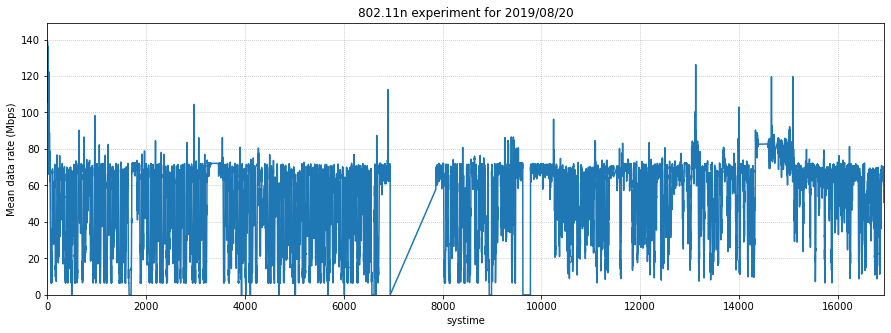

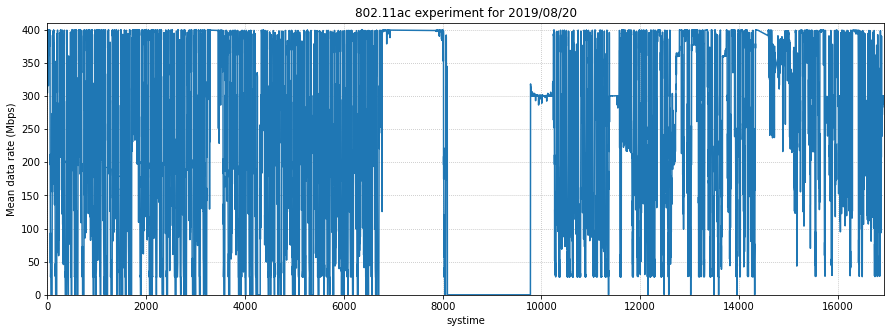

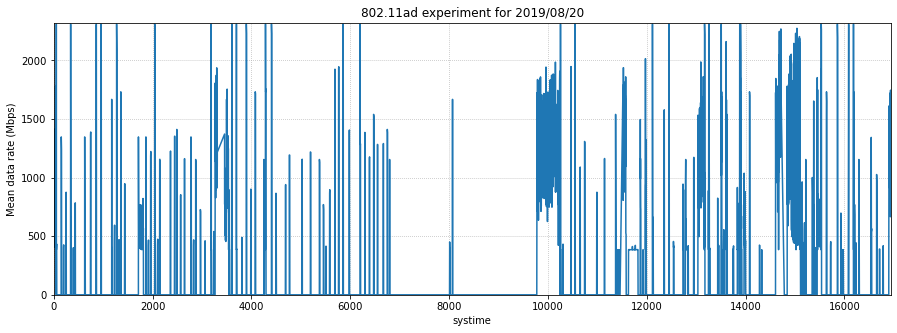

In [8]:
# Plots of different wifi types vs datarate over time
import matplotlib.pyplot as plt

name = 'systime'

for wifi in ['n', 'ac', 'ad']: 
    dframeNew = dframe[dframe['wifiType'] == wifi]  # focus on a particular type of wifi
   # dframeNew.drop(['wifiType'], axis = 1, inplace = True)
    
    fig = plt.figure(figsize=(15, 5))
    plt.title(f"802.11{wifi} experiment for 2019/08/20")
    plt.xlabel(name)
    plt.ylabel("Mean data rate (Mbps)")
    plt.grid(True, ls="dotted", lw=0.75)
    #fix magic number bs max(dframe["systime"])
    plt.xlim([min(dframeNew[name]), max(dframeNew[name])])
    plt.ylim([min(dframeNew["dataRateMean"]), max(dframeNew["dataRateMean"]) + 10])
    plt.plot(dframeNew[name], dframeNew["dataRateMean"])
    plt.show()

In [37]:
for wifi in ['n', 'ac', 'ad']:  
    dframeNew = dframe.loc[dframe["wifiType"] == wifi]
    corMat= dframeNew.corr(method="kendall")
    display(corMat.style.background_gradient(cmap="coolwarm", axis=None).set_precision(2))

,systime,traceNr,lon,lat,receiverAlt,receiverX,receiverY,receiverDist,receiverSpeed,isInLap,...,channelUtil,dataRateMedian,dataRateMean,nBytesReceived,tghptConsumer,nrClients,nRetries,meanBeaconRssi,meanInterBeaconTime,nBeacons
systime,1.000000,0.908959,0.039495,0.011253,-0.066947,-0.039495,0.011253,-0.193661,-0.181818,NaN,...,0.067068,0.199798,0.188818,0.115757,0.132611,0.342558,0.060759,0.176291,0.037181,-0.039926
traceNr,0.908959,1.000000,0.036636,0.014978,-0.061837,-0.036636,0.014978,-0.217216,-0.206045,NaN,...,0.082373,0.230811,0.218805,0.140685,0.156176,0.376868,0.074475,0.210025,0.017774,-0.019328
lon,0.039495,0.036636,1.000000,0.111814,0.402983,-1.000000,0.111814,-0.119571,-0.087182,NaN,...,0.018949,0.091001,0.089020,0.043262,0.086942,0.008650,-0.003388,0.092052,0.140256,-0.145855
lat,0.011253,0.014978,0.111814,1.000000,0.289797,-0.111814,1.000000,0.024431,-0.068653,NaN,...,0.252746,0.176888,0.155608,0.159596,0.181159,0.024969,0.205151,0.091389,-0.020406,0.022254
receiverAlt,-0.066947,-0.061837,0.402983,0.289797,1.000000,-0.402983,0.289797,-0.003069,-0.036552,NaN,...,-0.000233,0.027208,0.023743,0.078476,0.078897,-0.126139,0.118965,0.007094,0.149686,-0.156323
receiverX,-0.039495,-0.036636,-1.000000,-0.111814,-0.402983,1.000000,-0.111814,0.119571,0.087182,NaN,...,-0.018949,-0.091001,-0.089020,-0.043262,-0.086942,-0.008650,0.003388,-0.092052,-0.140256,0.145855
receiverY,0.011253,0.014978,0.111814,1.000000,0.289797,-0.111814,1.000000,0.024431,-0.068653,NaN,...,0.252746,0.176888,0.155608,0.159596,0.181159,0.024969,0.205151,0.091389,-0.020406,0.022254
receiverDist,-0.193661,-0.217216,-0.119571,0.024431,-0.003069,0.119571,0.024431,1.000000,0.236395,NaN,...,-0.186567,-0.565925,-0.558831,-0.442853,-0.472192,-0.045702,-0.167606,-0.662060,-0.033281,0.034836
receiverSpeed,-0.181818,-0.206045,-0.087182,-0.068653,-0.036552,0.087182,-0.068653,0.236395,1.000000,NaN,...,-0.066902,-0.258782,-0.262693,-0.252710,-0.249698,-0.084586,-0.006007,-0.243821,-0.035719,0.039413
isInLap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,systime,traceNr,lon,lat,receiverAlt,receiverX,receiverY,receiverDist,receiverSpeed,isInLap,...,channelUtil,dataRateMedian,dataRateMean,nBytesReceived,tghptConsumer,nrClients,nRetries,meanBeaconRssi,meanInterBeaconTime,nBeacons
systime,1.000000,0.908959,0.039495,0.011253,-0.066947,-0.039495,0.011253,-0.193661,-0.181818,NaN,...,-0.084720,0.145792,0.136318,0.226192,0.185910,0.342558,0.110164,-0.003018,-0.007442,-0.002862
traceNr,0.908959,1.000000,0.036636,0.014978,-0.061837,-0.036636,0.014978,-0.217216,-0.206045,NaN,...,-0.090159,0.167979,0.156106,0.260706,0.209251,0.376868,0.124467,-0.002261,-0.005751,-0.002093
lon,0.039495,0.036636,1.000000,0.111814,0.402983,-1.000000,0.111814,-0.119571,-0.087182,NaN,...,0.148277,0.215237,0.209536,0.138604,0.176777,0.008650,0.108000,0.011480,0.039963,0.011138
lat,0.011253,0.014978,0.111814,1.000000,0.289797,-0.111814,1.000000,0.024431,-0.068653,NaN,...,0.209444,0.180657,0.178551,0.138666,0.164352,0.024969,0.305457,0.042187,0.101741,0.042518
receiverAlt,-0.066947,-0.061837,0.402983,0.289797,1.000000,-0.402983,0.289797,-0.003069,-0.036552,NaN,...,0.171842,0.139078,0.135532,0.121216,0.118774,-0.126139,0.217458,0.024113,0.059783,0.024196
receiverX,-0.039495,-0.036636,-1.000000,-0.111814,-0.402983,1.000000,-0.111814,0.119571,0.087182,NaN,...,-0.148277,-0.215237,-0.209536,-0.138604,-0.176777,-0.008650,-0.108000,-0.011480,-0.039963,-0.011138
receiverY,0.011253,0.014978,0.111814,1.000000,0.289797,-0.111814,1.000000,0.024431,-0.068653,NaN,...,0.209444,0.180657,0.178551,0.138666,0.164352,0.024969,0.305457,0.042187,0.101741,0.042518
receiverDist,-0.193661,-0.217216,-0.119571,0.024431,-0.003069,0.119571,0.024431,1.000000,0.236395,NaN,...,0.106716,-0.463356,-0.437701,-0.468891,-0.530679,-0.045702,-0.044854,0.009504,0.027211,0.010165
receiverSpeed,-0.181818,-0.206045,-0.087182,-0.068653,-0.036552,0.087182,-0.068653,0.236395,1.000000,NaN,...,0.203568,-0.248356,-0.246158,-0.285300,-0.290805,-0.084586,0.064674,0.058599,0.125059,0.058991
isInLap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,systime,traceNr,lon,lat,receiverAlt,receiverX,receiverY,receiverDist,receiverSpeed,isInLap,...,channelUtil,dataRateMedian,dataRateMean,nBytesReceived,tghptConsumer,nrClients,nRetries,meanBeaconRssi,meanInterBeaconTime,nBeacons
systime,1.000000,0.908959,0.039495,0.011253,-0.066947,-0.039495,0.011253,-0.193661,-0.181818,NaN,...,0.150534,0.122372,0.121233,0.123136,0.096225,0.432217,0.133727,NaN,-0.163154,0.182518
traceNr,0.908959,1.000000,0.036636,0.014978,-0.061837,-0.036636,0.014978,-0.217216,-0.206045,NaN,...,0.185459,0.161157,0.159984,0.164735,0.131481,0.475507,0.176436,NaN,-0.192103,0.213760
lon,0.039495,0.036636,1.000000,0.111814,0.402983,-1.000000,0.111814,-0.119571,-0.087182,NaN,...,-0.014058,-0.037982,-0.036467,-0.047616,-0.018583,0.035577,-0.046391,NaN,0.030184,-0.009581
lat,0.011253,0.014978,0.111814,1.000000,0.289797,-0.111814,1.000000,0.024431,-0.068653,NaN,...,0.009529,-0.016213,-0.018177,-0.024079,0.000436,0.037905,-0.032448,NaN,-0.013223,0.021900
receiverAlt,-0.066947,-0.061837,0.402983,0.289797,1.000000,-0.402983,0.289797,-0.003069,-0.036552,NaN,...,-0.050643,-0.066569,-0.066630,-0.069972,-0.076670,-0.106581,-0.082486,NaN,0.072530,-0.058492
receiverX,-0.039495,-0.036636,-1.000000,-0.111814,-0.402983,1.000000,-0.111814,0.119571,0.087182,NaN,...,0.014058,0.037982,0.036467,0.047616,0.018583,-0.035577,0.046391,NaN,-0.030184,0.009581
receiverY,0.011253,0.014978,0.111814,1.000000,0.289797,-0.111814,1.000000,0.024431,-0.068653,NaN,...,0.009529,-0.016213,-0.018177,-0.024079,0.000436,0.037905,-0.032448,NaN,-0.013223,0.021900
receiverDist,-0.193661,-0.217216,-0.119571,0.024431,-0.003069,0.119571,0.024431,1.000000,0.236395,NaN,...,-0.546264,-0.436679,-0.432707,-0.448246,-0.368132,-0.066914,-0.385897,NaN,0.379736,-0.557135
receiverSpeed,-0.181818,-0.206045,-0.087182,-0.068653,-0.036552,0.087182,-0.068653,0.236395,1.000000,NaN,...,-0.271600,-0.287744,-0.283922,-0.303848,-0.364912,-0.097927,-0.342533,NaN,0.391107,-0.393731
isInLap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
import sklearn

dframeNew = dframe[dframe['wifiType'] == 'n']
print(dframeNew)
dframeNew = dframeNew.drop(['wifiType','senderId', 'receiverId'], axis = 1)

#print(dframeNew)

x = dframeNew.values # the values in the data frame
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x) # subtract mean and
# divide by standard deviation (yields mean=0, variance=1)

from sklearn import decomposition
pca = decomposition.PCA(n_components=0.95) # enough comps to explain 95% var
pca.fit(x)

print("Found", pca.n_components_, "PCA components:", pca.explained_variance_)
print("Explained variance ratios:", pca.explained_variance_ratio_)
print("Total:", sum(pca.explained_variance_ratio_))

xtrans = pca.transform(x) # apply dimensionality reduction to x
pcaDf = pandas.DataFrame(data = xtrans) # create a data frame out of x

       systime  traceNr       lon        lat  receiverAlt  receiverX  \
0          0.0      302 -8.631221  41.111852         88.1   6.265116   
1          1.0      302 -8.631221  41.111852         88.1   6.265116   
2          2.0      302 -8.631221  41.111852         88.1   6.265116   
3          3.0      302 -8.631221  41.111852         88.1   6.265116   
4          4.0      302 -8.631221  41.111852         88.1   6.265116   
5          5.0      302 -8.631221  41.111852         88.1   6.266540   
6          6.0      302 -8.631221  41.111852         88.1   6.267964   
7          7.0      302 -8.631221  41.111852         88.1   6.267964   
8          8.0      302 -8.631221  41.111852         88.1   6.267964   
9          9.0      302 -8.631221  41.111852         88.1   6.269304   
10        10.0      302 -8.631221  41.111852         88.1   6.270729   
11        11.0      302 -8.631221  41.111852         88.1   6.270729   
12        12.0      302 -8.631221  41.111852         88.1   6.27